In [41]:
#importing relevant libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [4]:
#Preparing the data for visualization

#Read the selected dataset
df = pd.read_csv('NBA Salaries(1990-2023).csv')

# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)
# Identify outliers
outliers = df[(df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'salary':")
print(outliers[['playerName', 'salary']])

# Remove outliers from 'salary' column
df = df[~((df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR))]


Q1 = df['inflationAdjSalary'].quantile(0.25)
Q3 = df['inflationAdjSalary'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)
# Identify outliers
outliers = df[(df['inflationAdjSalary'] < Q1 - 1.5 * IQR) | (df['inflationAdjSalary'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'inflationAdjSalary':")
print(outliers[['playerName', 'inflationAdjSalary']])

# Remove outliers from 'inflationAdjSalary' column
print("  After Fixing the Outliers:   ")
df = df[~((df['inflationAdjSalary'] < Q1 - 1.5 * IQR) | (df['inflationAdjSalary'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List Missing data before the Imputing:
columns_with_missing_data = df.columns[df.isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)
# Imputing the inconsistencies :
df['salary'] = df['salary'].fillna(df['salary'].mean()).astype(int)
df['inflationAdjSalary'] = df['inflationAdjSalary'].fillna(df['inflationAdjSalary'].mean()).astype(int)
print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


playerName            object
seasonStartYear        int64
salary                 int64
inflationAdjSalary     int64
dtype: object

     
Data Preparation 'b':
     
Outliers:
     


4038880.0

Outliers in 'salary':
            playerName    salary
1521     Magic Johnson  14660000
1939     Patrick Ewing  18724000
2390    Michael Jordan  30140000
2391      Horace Grant  14857000
2392     Reggie Miller  11250000
...                ...       ...
15317  Josh Richardson  11615328
15318    Marvin Bagley  11312114
15319   DeAndre Jordan  11109327
15320    Dwight Powell  11080125
15321   Devonte Graham  11000000

[1582 rows x 2 columns]


4079400.0

Outliers in 'inflationAdjSalary':
            playerName  inflationAdjSalary
352         Larry Bird            15403814
735     David Robinson            12089150
1136    David Robinson            11778567
1522    David Robinson            14615339
1523      James Worthy            14515234
...                ...                 ...
15322  Zion Williamson            11705820
15323   Larry Nance Jr            11659479
15324      Jeremy Lamb            11451274
15325   Reggie Jackson            11325310
15326   Richaun Holmes            11325310

[649 rows x 2 columns]
  After Fixing the Outliers:   


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


     
Missing data:
     
Columns with missing data:
Index([], dtype='object')
  After Fixing the Missing Data:   


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


In [5]:
 df=pd.read_csv("cleaned_data.csv")

# Statistical summaries
display(df.describe(include='number'))
display(df.describe(include='object'))

,seasonStartYear,salary,inflationAdjSalary
count,13626.000000,1.362600e+04,1.362600e+04
mean,2006.467489,2.195168e+06,3.175440e+06
std,9.615958,2.040533e+06,2.756306e+06
min,1990.000000,2.706000e+03,4.824000e+03
25%,1998.000000,6.750000e+05,1.049911e+06
50%,2007.000000,1.517981e+06,2.254333e+06
75%,2015.000000,3.120810e+06,4.663255e+06
max,2021.000000,1.033562e+07,1.129111e+07


,playerName
count,13626
unique,2811
top,Udonis Haslem
freq,20


Descriptive Analysis

0.9635918069925149

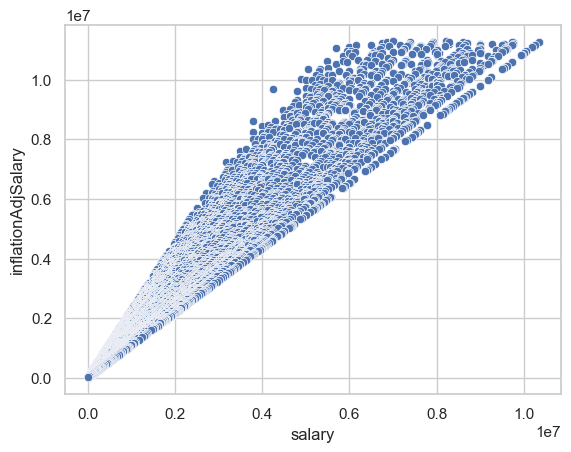

In [43]:
# Plotting the correlation between the variables Salary & Inflation Adjusted Salary

corr=df['salary'].corr(df['inflationAdjSalary'])
display(corr)

sns.scatterplot(x="salary", y="inflationAdjSalary", data=df);

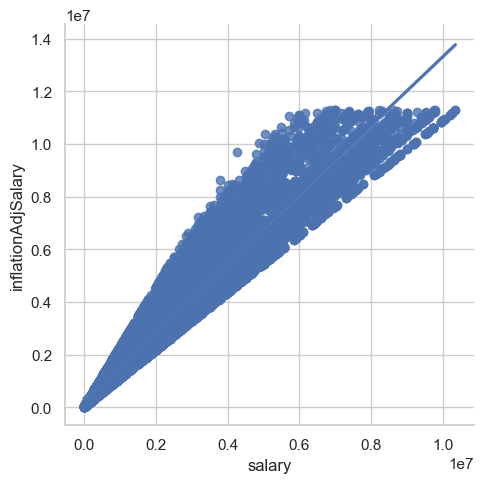

In [44]:
# Adding a best fit line to the plotted correlation

sns.lmplot(x='salary',y='inflationAdjSalary',data=df)

In [45]:
# Grouping the data by the Inflation Adjusted Salary variable

player_earnings=df.groupby('playerName')['inflationAdjSalary'].sum().reset_index()
sorted_player_earnings=player_earnings.sort_values(by='inflationAdjSalary',ascending=False).head(10)

# Extracting information for top ten players 
display(sorted_player_earnings)

,playerName,inflationAdjSalary
771,Donyell Marshall,118736088
1702,Louis Williams,113658248
1877,Metta World Peace,108536228
2635,Trevor Ariza,104680818
788,Drew Gooden,103243970
1613,Kyle Korver,103082329
39,Al Harrington,100164435
468,Christian Laettner,97972751
43,Al-Farouq Aminu,97714242
1328,Joe Smith,97647447


In [46]:
# Grouping the data by Salary variable

player_earnings2=df.groupby('playerName')['salary'].sum().reset_index()
sorted_player_earnings2=player_earnings2.sort_values(by='salary',ascending=False).head(10)

# Extracting information for top ten players 
display(sorted_player_earnings2)

,playerName,salary
1702,Louis Williams,92208319
43,Al-Farouq Aminu,82597906
2635,Trevor Ariza,81603910
1613,Kyle Korver,79272208
1877,Metta World Peace,75713906
788,Drew Gooden,75015681
1150,Jameer Nelson,72802422
771,Donyell Marshall,72417867
2687,Udonis Haslem,71639344
527,DJ Augustin,71375190


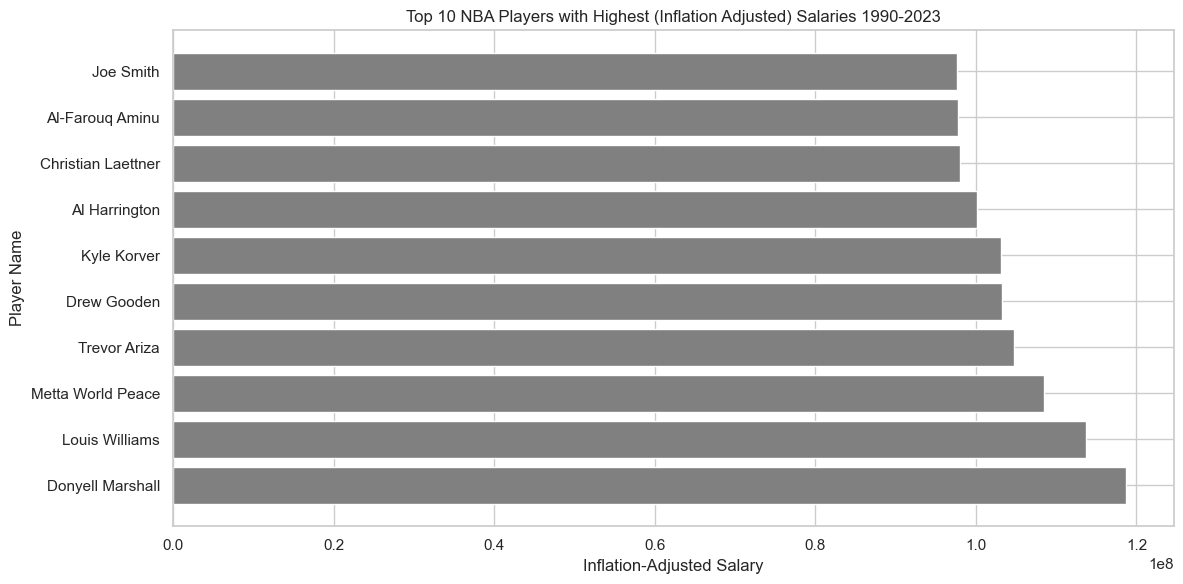

In [47]:
# Visualising the highest paid NBA players-  in terms of Inflation Adjusted Salary

# Set the size of the figure
plt.figure(figsize=(12, 6))
# Create a horizontal bar chart with player names on the y-axis and inflation-adjusted salaries on the x-axis
fig_bar=plt.barh(sorted_player_earnings['playerName'], sorted_player_earnings['inflationAdjSalary'], color='grey')
# Label the x-axis
plt.xlabel('Inflation-Adjusted Salary')
# Label the y-axis
plt.ylabel('Player Name')
# Set the title of the plot
plt.title('Top 10 NBA Players with Highest (Inflation Adjusted) Salaries 1990-2023')
# Ensure tight layout to prevent clipping of axis labels
plt.tight_layout()
# Display the plot
plt.show()


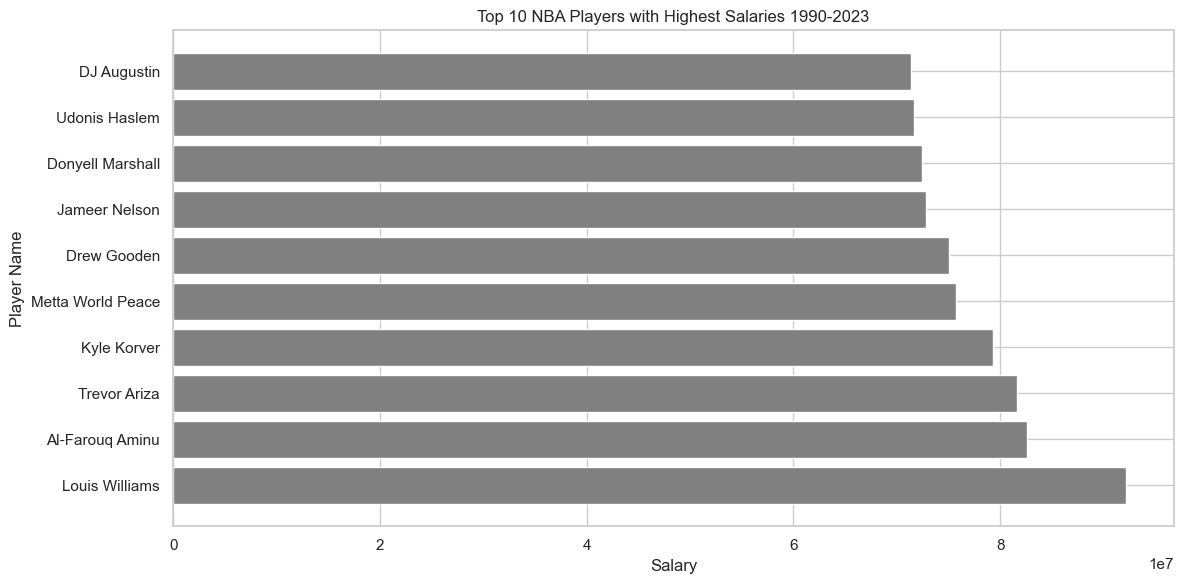

In [49]:
# Visualising the highest paid NBA players-  in terms of Salary

# Set the size of the figure
plt.figure(figsize=(12, 6))
# Create a horizontal bar chart with player names on the y-axis and salaries on the x-axis
fig_bar=plt.barh(sorted_player_earnings2['playerName'], sorted_player_earnings2['salary'], color='grey')
# Label the x-axis
plt.xlabel('Salary')
# Label the y-axis
plt.ylabel('Player Name')
# Set the title of the plot
plt.title('Top 10 NBA Players with Highest Salaries 1990-2023')
# Ensure tight layout to prevent clipping of axis labels
plt.tight_layout()
# Display the plot
plt.show()

In [50]:
# Merge two DataFrames, sorted_player_earnings2 and sorted_player_earnings, on the 'playerName' column
merged_df=pd.merge(sorted_player_earnings2,sorted_player_earnings,on='playerName')
# Display the merged DataFrame
display(merged_df)

,playerName,salary,inflationAdjSalary
0,Louis Williams,92208319,113658248
1,Al-Farouq Aminu,82597906,97714242
2,Trevor Ariza,81603910,104680818
3,Kyle Korver,79272208,103082329
4,Metta World Peace,75713906,108536228
5,Drew Gooden,75015681,103243970
6,Donyell Marshall,72417867,118736088


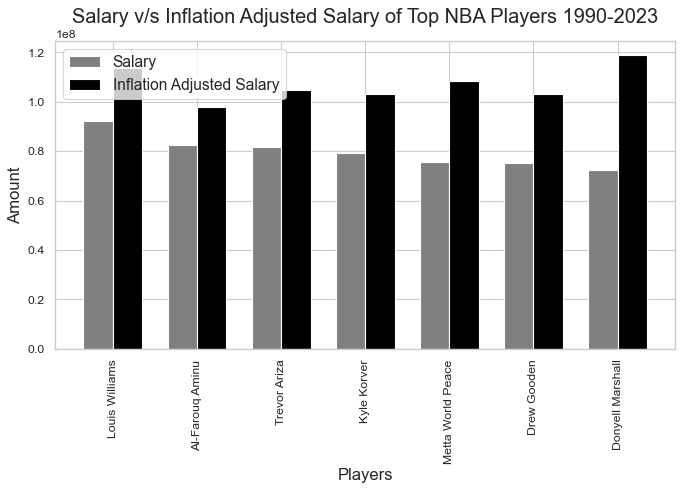

In [53]:
# Visualising comparison between the two variables- Salary & Inflation Adjusted Salary- using a bar chart
# Extracting data from the merged DataFrame
player_salary = merged_df['salary']
player_infl_salary= merged_df['inflationAdjSalary']
player_names= merged_df['playerName']

# Setting up the figure and axis
plt.figure(figsize=(10,5),dpi=80)
bar_width=0.35
index=np.arange(len(player_names))

# Creating a grouped bar chart with salary and inflation-adjusted salary
plt.bar(index,player_salary,width=bar_width, color='grey',label='Salary')
plt.bar(index+bar_width,player_infl_salary,width=bar_width, color='black',label='Inflation Adjusted Salary')

# Adding labels and title
plt.xlabel('Players',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.title('Salary v/s Inflation Adjusted Salary of Top NBA Players 1990-2023',fontsize=18)

# Setting x-axis ticks and labels
plt.xticks(index+bar_width/2,player_names,rotation=90)

# Adding legend
plt.legend(loc=2, prop={'size': 14})

# Display the plot
plt.show()

In [51]:
# Grouping the DataFrame 'df' by player name and season start year, then summing up the 'salary' and 'inflationAdjSalary' for each group
player_earnings = df.groupby(['playerName', 'seasonStartYear'])[['salary', 'inflationAdjSalary']].sum().reset_index()

# Sorting the grouped DataFrame by 'inflationAdjSalary' in descending order and selecting the top 10 entries
sorted_player_earnings = player_earnings.sort_values(by='inflationAdjSalary', ascending=False).head(10)

display(sorted_player_earnings)

,playerName,seasonStartYear,salary,inflationAdjSalary
197,Al-Farouq Aminu,2021,20671242,22544004
629,Anthony Edwards,2021,20490960,22347390
8070,Luka Doncic,2021,20348782,22192332
1669,Cade Cunningham,2021,20100240,21921272
2804,Danny Green,2021,20000000,21811950
12096,Tomas Satoransky,2021,20000000,21811950
12392,Tristan Thompson,2021,19893222,21695498
7551,Kyle Anderson,2021,19874300,21674862
3368,Derrick Jones,2021,19441800,21203180
3361,Derrick Favors,2021,19441800,21203180


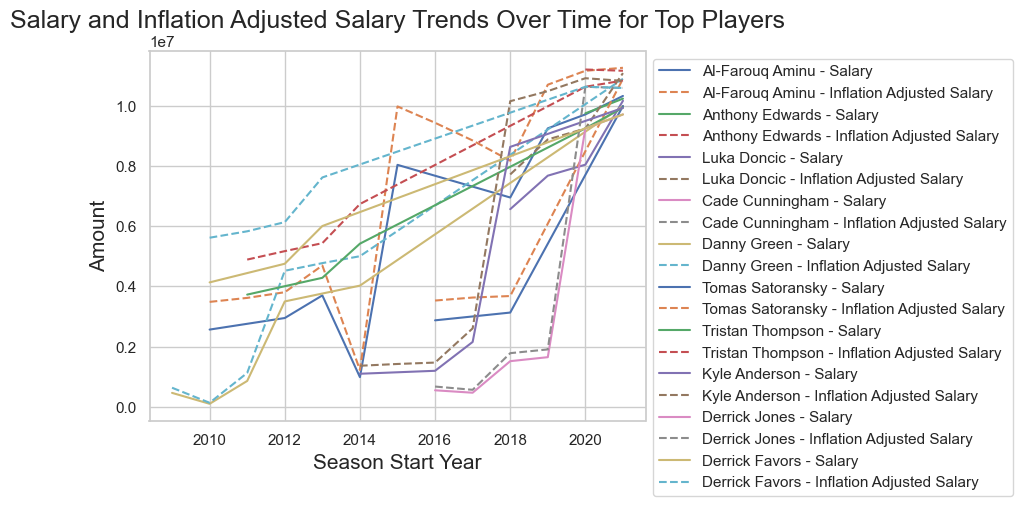

In [52]:
# Visualising trends between two variables- Salary & Inflation Adjusted Salary for top players

# Iterating through each player in the sorted_player_earnings DataFrame
for player in sorted_player_earnings['playerName']:
    player_data = df[df['playerName'] == player]
    plt.plot(player_data['seasonStartYear'], player_data['salary'], label=f'{player} - Salary')
    plt.plot(player_data['seasonStartYear'], player_data['inflationAdjSalary'], label=f'{player} - Inflation Adjusted Salary', linestyle='dashed')

# Adding labels and title
plt.xlabel('Season Start Year', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Salary and Inflation Adjusted Salary Trends Over Time for Top Players', fontsize=18)

# Adding legend to the upper left outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

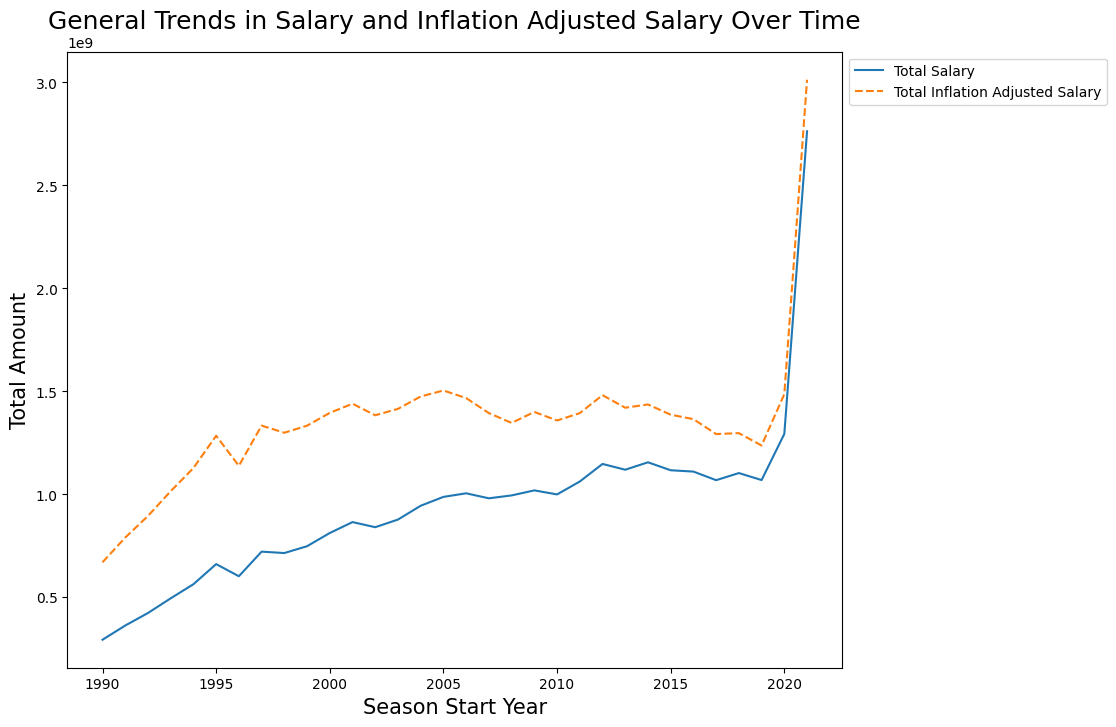

In [37]:
# Visualising general trends in Salary and Inflation Adjusted Salary over the period 1990-2023

plt.figure(figsize=(10, 8))

# Aggregate the data for all players
total_data = df.groupby('seasonStartYear')[['salary', 'inflationAdjSalary']].sum().reset_index()

# Plot the general trend for both salary and inflation-adjusted salary
plt.plot(total_data['seasonStartYear'], total_data['salary'], label='Total Salary')
plt.plot(total_data['seasonStartYear'], total_data['inflationAdjSalary'], label='Total Inflation Adjusted Salary', linestyle='dashed')

plt.xlabel('Season Start Year', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.title('General Trends in Salary and Inflation Adjusted Salary Over Time', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

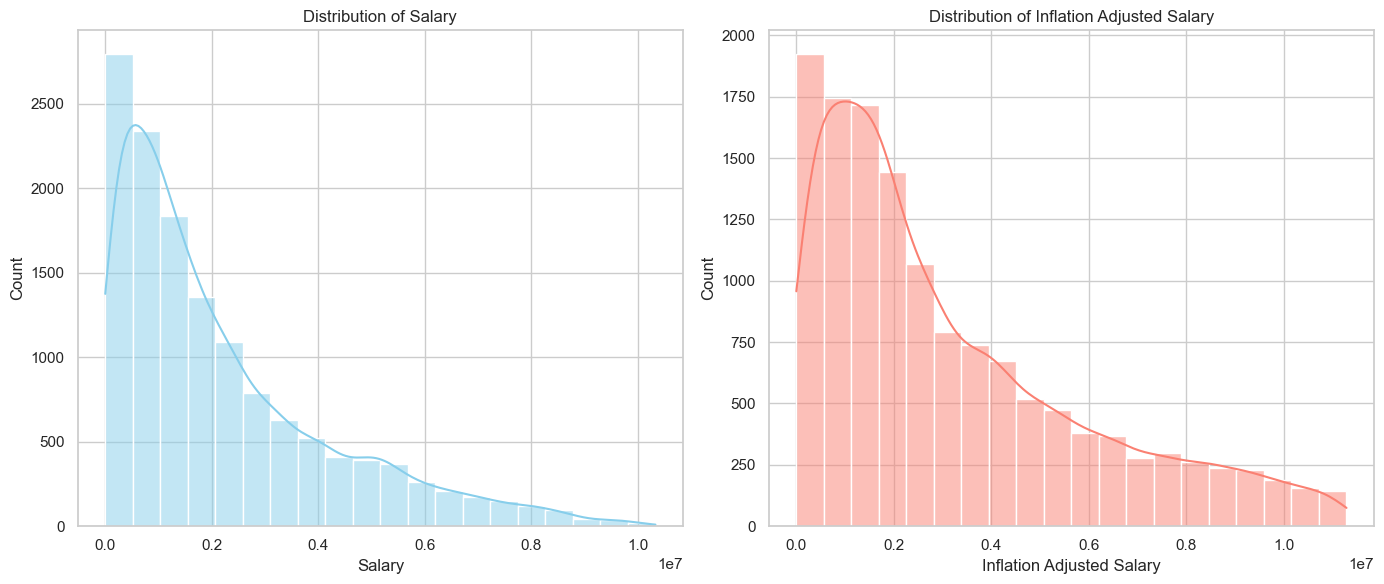

In [54]:
# Visualising distribution analysis of two variables- Salary & Inflation Adjusted Salary

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot histograms for salary and inflation-adjusted salary
sns.histplot(df['salary'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Salary')
axes[0].set_xlabel('Salary')

sns.histplot(df['inflationAdjSalary'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Inflation Adjusted Salary')
axes[1].set_xlabel('Inflation Adjusted Salary')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [55]:
# Modelling regression analysis relationship

# Assuming df has 'salary' as the dependent variable, 'inflationAdjSalary' as the independent variable,
# and other potential independent variables

# Add a constant term to the independent variables
df['constant'] = 1

# Define independent and dependent variables
X = df[['constant', 'inflationAdjSalary']]  # You can add more independent variables here
y = df['salary']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.769e+05
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:30:37   Log-Likelihood:            -1.9933e+05
No. Observations:               13626   AIC:                         3.987e+05
Df Residuals:                   13624   BIC:                         3.987e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant           -7.007e+04   7130